# **CarMax Analysis**

**CarMax is considering opening new stores in the United States. How should marketing and inventory strategy be approached to drive maximum sales depending on the location of the new store?**

* `Campaign A touchpoints`: Number of marketing touchpoints a purchaser or non-purchaser had with Campaign A.

* `Campaign B touchpoints`: Number of marketing touchpoints a purchaser or non-purchaser had with Campaign B.

* `Campaign C touchpoints`: Number of marketing touchpoints a purchaser or non-purchaser had with Campaign C.

* `Total marketing touchpoints`: The total number of marketing touchpoints (campaign A + campaign B + campaign C).

* `Number of web touchpoints`: Number of web visits a purchaser or non-purchaser had during their shopping journey.

* `Purchase flag`: Whether the customer purchased (1) or not (0) a vehicle from CarMax.

* `Vehicle class`: The body description of the purchased vehicle.

* `Finance customer`: Whether the purchaser financed their vehicle (1) or purchased it outright (0).

* `Service plan customer`: Whether the customer purchased (1) or not (0) a service plan with their purchased vehicle.

* `Trade in customer`: Whether the customer sold (1) or not (0) a vehicle to CarMax. Can be independent of a purchase from CarMax. Non-purchasers can sell their vehicle to CarMax without purchasing a vehicle.

* `State`: The state of the transaction.

* `Unaided awareness`: How well the average person in a market recalls the CarMax brand without any priming from 0 (CarMax unknown) to 1 (CarMax fully known). While this information is given at the market level, the actual markets to which they apply are not specified.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
# read data
df = pd.read_csv('../data/Fall 2024 Dataset.csv')

In [79]:
df.head()


,Unnamed: 0,campaign_a_touchpoints,campaign_b_touchpoints,campaign_c_touchpoints,total_touchpoints,num_web_visits,purchase_flag,vehicle_class,finance_customer,service_plan_customer,trade_in_customer,state,unaided_awareness
0,0,10,0,0,10,27,False,NaN,0,0,True,TN,0.129019
1,1,0,1,0,1,92,False,NaN,0,0,False,TN,0.333228
2,2,0,5,0,5,9,False,NaN,0,0,False,SC,0.226145
3,3,0,5,0,5,7,False,NaN,0,0,False,DE,0.143720
4,4,0,0,0,0,13,True,MEDIUM SUV,0,1,False,VA,0.457150


# 1.Data Cleaning


## 1.1 Rename columns

In [80]:
# rename columns
df.rename(columns = {'Unnamed: 0': 'id'}, inplace = True)

In [81]:
df.head()


,id,campaign_a_touchpoints,campaign_b_touchpoints,campaign_c_touchpoints,total_touchpoints,num_web_visits,purchase_flag,vehicle_class,finance_customer,service_plan_customer,trade_in_customer,state,unaided_awareness
0,0,10,0,0,10,27,False,NaN,0,0,True,TN,0.129019
1,1,0,1,0,1,92,False,NaN,0,0,False,TN,0.333228
2,2,0,5,0,5,9,False,NaN,0,0,False,SC,0.226145
3,3,0,5,0,5,7,False,NaN,0,0,False,DE,0.143720
4,4,0,0,0,0,13,True,MEDIUM SUV,0,1,False,VA,0.457150


## 1.2 Check for missing values
Vehicle class has multiple missing values, this make sense as not everyone would buy a vehicle (purchase flag = false)

In [82]:
df.isnull().sum()

id                            0
campaign_a_touchpoints        0
campaign_b_touchpoints        0
campaign_c_touchpoints        0
total_touchpoints             0
num_web_visits                0
purchase_flag                 0
vehicle_class             69997
finance_customer              0
service_plan_customer         0
trade_in_customer             0
state                         0
unaided_awareness             0
dtype: int64

## 1.3 Check dtypes and column consistency
Data types are all correct
However, there are some inconsistencies in the column, some binary columns are labeled as 0 and 1, some are labeled as True and False. We should decide on a consistent way to label these columns.


In [83]:
df.dtypes


id                          int64
campaign_a_touchpoints      int64
campaign_b_touchpoints      int64
campaign_c_touchpoints      int64
total_touchpoints           int64
num_web_visits              int64
purchase_flag                bool
vehicle_class              object
finance_customer            int64
service_plan_customer       int64
trade_in_customer            bool
state                      object
unaided_awareness         float64
dtype: object

In [84]:
df['purchase_flag'] = df['purchase_flag'].astype(int)
df['trade_in_customer'] = df['trade_in_customer'].astype(int)


# 2. EDA

## 2.1 Univariate Analysis


In [85]:
df.apply(lambda col: col.unique())

id                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
campaign_a_touchpoints    [10, 0, 2, 1, 5, 28, 26, 3, 12, 17, 35, 15, 4,...
campaign_b_touchpoints    [0, 1, 5, 3, 9, 2, 8, 7, 4, 6, 18, 10, 20, 12,...
campaign_c_touchpoints    [0, 1, 5, 2, 3, 6, 7, 4, 8, 9, 12, 11, 20, 14,...
total_touchpoints         [10, 1, 5, 0, 3, 9, 2, 7, 4, 6, 13, 18, 28, 20...
num_web_visits            [27, 92, 9, 7, 13, 98, 16, 2, 30, 4, 58, 14, 2...
purchase_flag                                                        [0, 1]
vehicle_class             [nan, MEDIUM SUV, MID SIZE, PICKUP, SPORTS CAR...
finance_customer                                                     [0, 1]
service_plan_customer                                                [0, 1]
trade_in_customer                                                    [1, 0]
state                     [TN, SC, DE, VA, MI, WI, NV, NY, MO, NE, MD, W...
unaided_awareness         [0.129019393, 0.333227512, 0.226145385, 0.1437...
dtype: objec

In [99]:
cat_attribs = ['vehicle_class', 'state']
bin_attribs = ['purchase_flag', 'finance_customer', 'service_plan_customer', 'trade_in_customer']
num_attribs = ['campaign_a_touchpoints', 'campaign_b_touchpoints', 'campaign_c_touchpoints', 'total_touchpoints', 'number_of_web_touchpoints', 'unaided_awareness']

### 2.1.1 Numeric Features


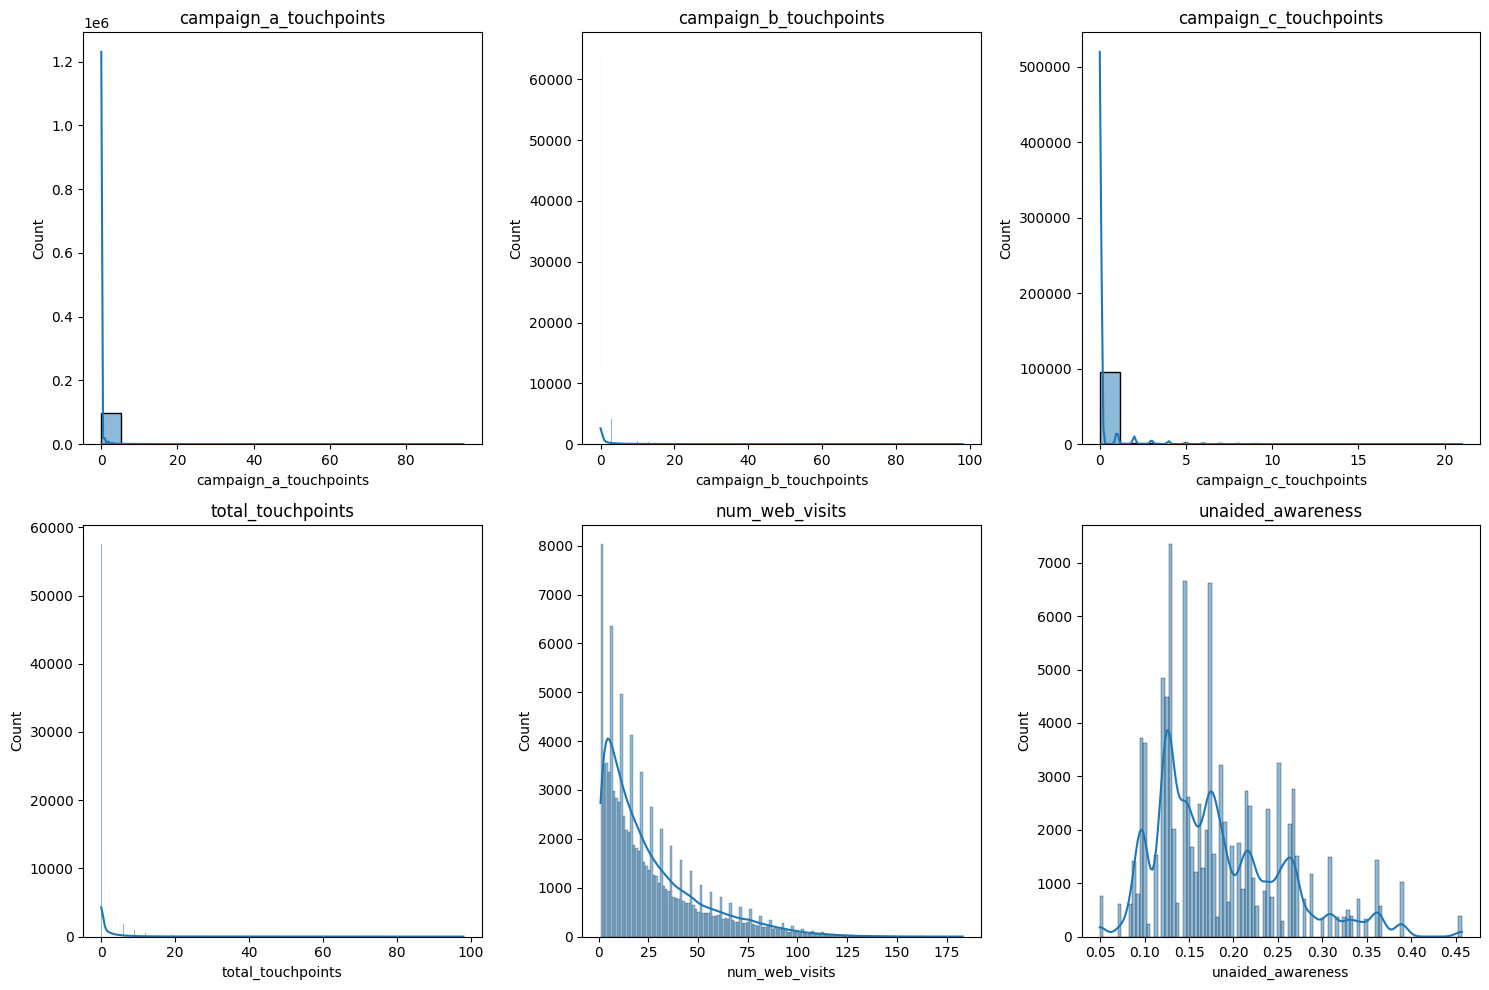

In [98]:
# Define the number of rows and columns for subplots
num_rows = 2
num_cols = (len(num_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over numerical attributes
axes = axes.flatten()

# Iterate over numerical attributes and plot histograms
for i, column in enumerate(num_attribs):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

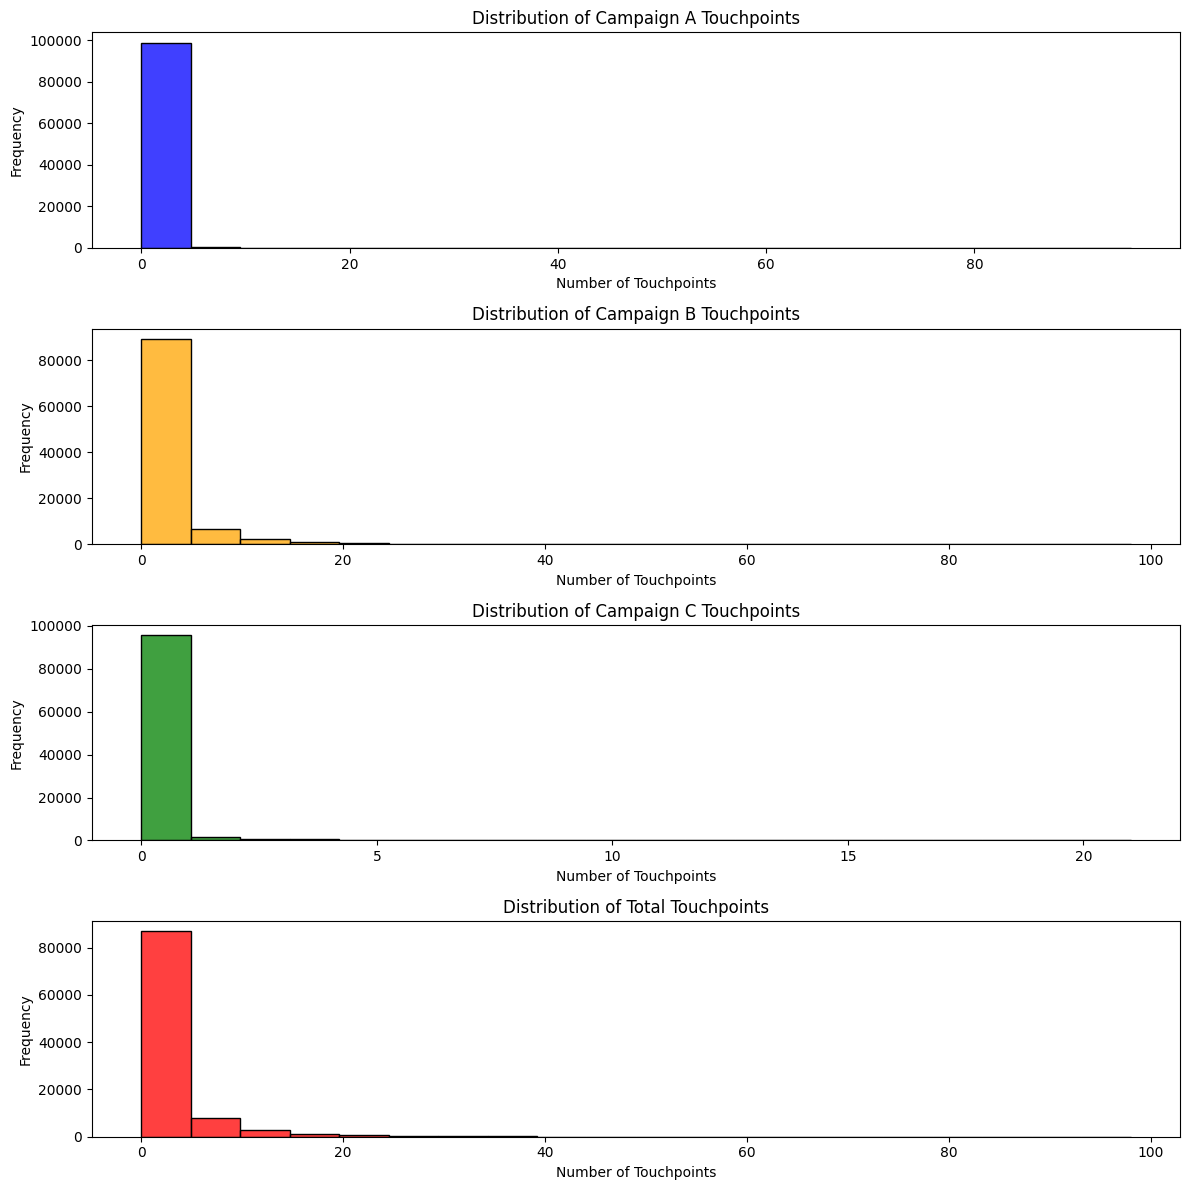

In [88]:
# Plot the distribution of campaign touchpoints using histograms
plt.figure(figsize=(12, 12))

# Create a histogram for each campaign touchpoint
plt.subplot(4, 1, 1)
sns.histplot(df['campaign_a_touchpoints'], bins=20, color='blue')
plt.title('Distribution of Campaign A Touchpoints')
plt.xlabel('Number of Touchpoints')
plt.ylabel('Frequency')

plt.subplot(4, 1, 2)
sns.histplot(df['campaign_b_touchpoints'], bins=20, color='orange')
plt.title('Distribution of Campaign B Touchpoints')
plt.xlabel('Number of Touchpoints')
plt.ylabel('Frequency')

plt.subplot(4, 1, 3)
sns.histplot(df['campaign_c_touchpoints'], bins=20, color='green')
plt.title('Distribution of Campaign C Touchpoints')
plt.xlabel('Number of Touchpoints')
plt.ylabel('Frequency')

plt.subplot(4, 1, 4)
sns.histplot(df['total_touchpoints'], bins=20, color='red')
plt.title('Distribution of Total Touchpoints')
plt.xlabel('Number of Touchpoints')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [97]:
# Calculate total reach touchpoint for each campaign
total_reach_a = f"{int(df['campaign_a_touchpoints'].sum()):,}"
total_reach_b = f"{int(df['campaign_b_touchpoints'].sum()):,}"
total_reach_c = f"{int(df['campaign_c_touchpoints'].sum()):,}"
total_reach_total = f"{int(df['total_touchpoints'].sum()):,}"  # Added total touchpoints

# Calculate average touchpoint for each campaign
average_a = round(df['campaign_a_touchpoints'].mean(), 2)
average_b = round(df['campaign_b_touchpoints'].mean(), 2)
average_c = round(df['campaign_c_touchpoints'].mean(), 2)
average_total = round(df['total_touchpoints'].mean(), 2)  # Added average total touchpoints

# Calculate standard deviation of touchpoints for each campaign
std_a = round(df['campaign_a_touchpoints'].std(), 2)
std_b = round(df['campaign_b_touchpoints'].std(), 2)
std_c = round(df['campaign_c_touchpoints'].std(), 2)
std_total = round(df['total_touchpoints'].std(), 2)  # Added standard deviation of total touchpoints

# Calculate percentage of touchpoints equal to 0 for each campaign
percentage_zero_a = round((df['campaign_a_touchpoints'] == 0).sum() / len(df) * 100, 2)
percentage_zero_b = round((df['campaign_b_touchpoints'] == 0).sum() / len(df) * 100, 2)
percentage_zero_c = round((df['campaign_c_touchpoints'] == 0).sum() / len(df) * 100, 2)
percentage_zero_total = round((df['total_touchpoints'] == 0).sum() / len(df) * 100, 2)  # Added percentage of total touchpoints equal to 0

# Calculate percentage of touchpoints from 0 to 5 for each campaign
percentage_0_to_5_a = round(((df['campaign_a_touchpoints'] > 0) & (df['campaign_a_touchpoints'] <= 5)).sum() / len(df) * 100, 2)
percentage_0_to_5_b = round(((df['campaign_b_touchpoints'] > 0) & (df['campaign_b_touchpoints'] <= 5)).sum() / len(df) * 100, 2)
percentage_0_to_5_c = round(((df['campaign_c_touchpoints'] > 0) & (df['campaign_c_touchpoints'] <= 5)).sum() / len(df) * 100, 2)
percentage_0_to_5_total = round(((df['total_touchpoints'] > 0) & (df['total_touchpoints'] <= 5)).sum() / len(df) * 100, 2)  # Added percentage of total touchpoints from 0 to 5

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Metric': ['Total Reach', 'Average', 'Standard Deviation', 'Count of 0 Touchpoints', 'Count of Touchpoints (0-5)'],
    'Campaign A': [total_reach_a, average_a, std_a, percentage_zero_a, percentage_0_to_5_a],
    'Campaign B': [total_reach_b, average_b, std_b, percentage_zero_b, percentage_0_to_5_b],
    'Campaign C': [total_reach_c, average_c, std_c, percentage_zero_c, percentage_0_to_5_c],
    'Total': [total_reach_total, average_total, std_total, percentage_zero_total, percentage_0_to_5_total]  # Added total metrics
})

# Display the summary DataFrame
summary_df.head()

,Metric,Campaign A,Campaign B,Campaign C,Total
0,Total Reach,"18,565","164,406","17,944","200,915"
1,Average,0.19,1.64,0.18,2.01
2,Standard Deviation,1.64,4.33,0.83,4.71
3,Count of 0 Touchpoints,95.96,64.52,92.77,57.5
4,Count of Touchpoints (0-5),3.1,26.82,6.67,31.85


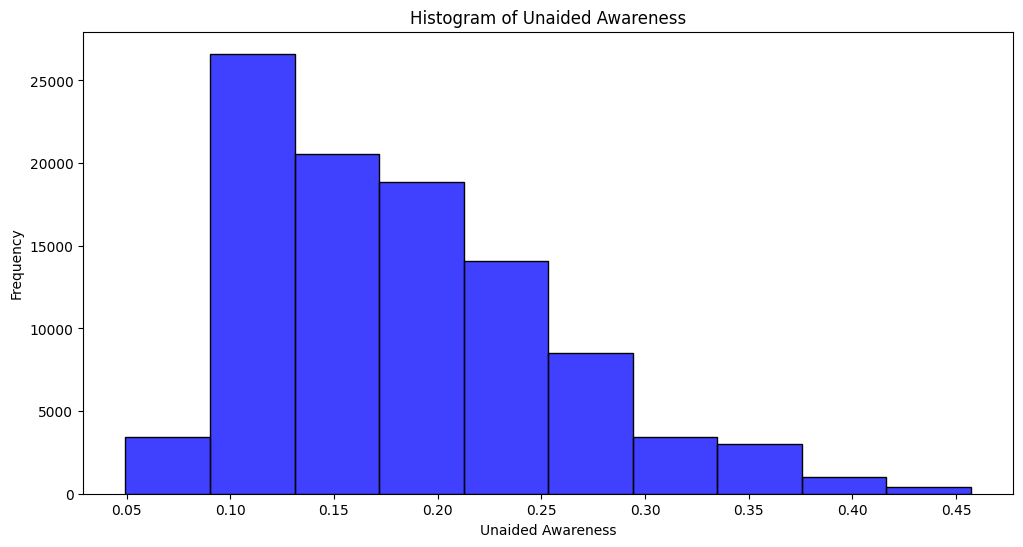

In [90]:
# Histogram of Unaided Awareness
plt.figure(figsize=(12, 6))
sns.histplot(df['unaided_awareness'], bins=10, color='blue')
plt.title('Histogram of Unaided Awareness')
plt.xlabel('Unaided Awareness')
plt.ylabel('Frequency')
plt.show()


### 2.1.3 Categorical Features

## 2.2 Bivariate Analysis


C:\Users\hamin\AppData\Local\Temp\ipykernel_97964\309084144.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_rate_by_state, x='state', y='conversion_rate',


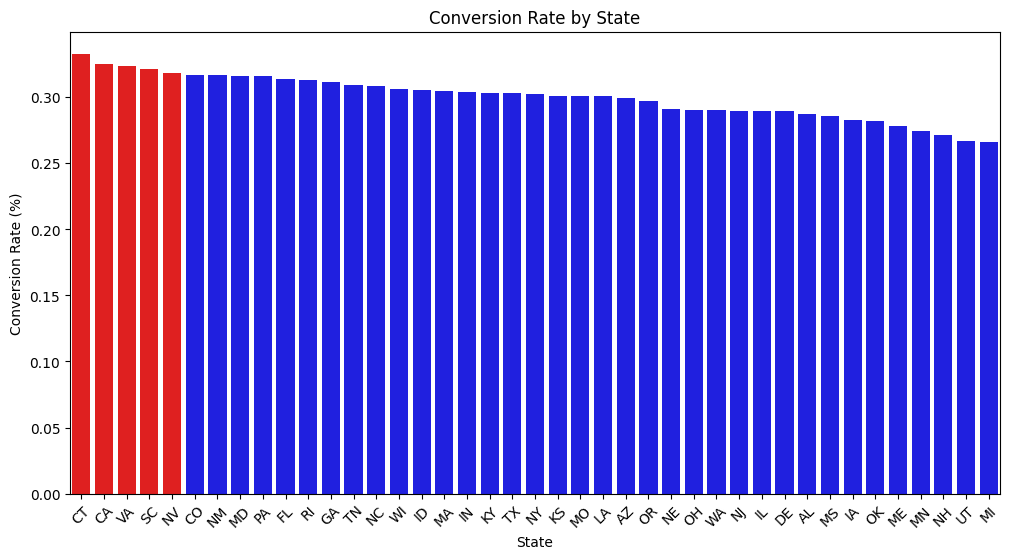

In [91]:
conversion_rate_by_state = df.groupby('state')['purchase_flag'].mean().reset_index()
conversion_rate_by_state.columns = ['state', 'conversion_rate']

# Order the conversion rates in descending order
conversion_rate_by_state = conversion_rate_by_state.sort_values(by='conversion_rate', ascending=False)

# Visualize the conversion rate by state
plt.figure(figsize=(12, 6))
sns.barplot(data=conversion_rate_by_state, x='state', y='conversion_rate', 
            palette=['blue' if x not in conversion_rate_by_state.nlargest(5, 'conversion_rate')['conversion_rate'].values else 'red' for x in conversion_rate_by_state['conversion_rate']])
plt.title('Conversion Rate by State')
plt.xlabel('State')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)

plt.show()


Therefore, we can see that the top 5 states with the highest conversion rates are:
1. CT
2. CA
3. VA
4. SC
5. NV


C:\Users\hamin\AppData\Local\Temp\ipykernel_97964\4075373187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='state', y='unaided_awareness', palette='Set2')


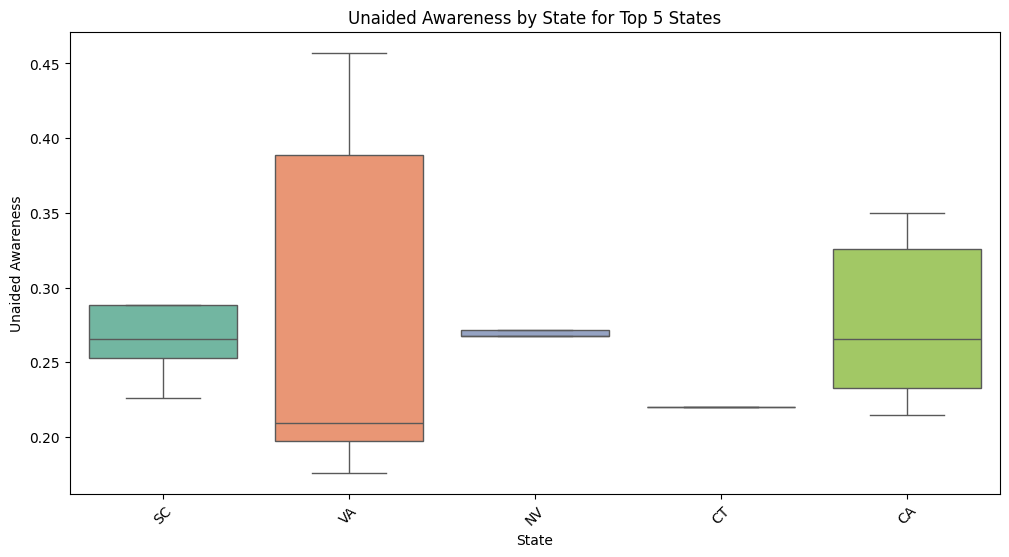

In [92]:
# Filter the DataFrame for the top 5 states
top_states = ['CT', 'CA', 'VA', 'SC', 'NV']
filtered_df = df[df['state'].isin(top_states)]

# Plotting Unaided Awareness for the top 5 states
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='state', y='unaided_awareness', palette='Set2')
plt.title('Unaided Awareness by State for Top 5 States')
plt.xlabel('State')
plt.ylabel('Unaided Awareness')
plt.xticks(rotation=45)
plt.show()
